In [1]:
# !pip install plotly
# !pip install matplotlib==3.5.0

In [1]:
import pandas as pd
import numpy as np
import glob
from tqdm import tqdm, trange
#import pickle5 as pickle


import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import plotly.express as px
from difflib import SequenceMatcher
import seaborn as sns

In [53]:
def millions(x, pos):
    """The two args are the value and tick position."""
    return '{:1.1f}M'.format(x*1e-6)


In [7]:
# with open('data/morbilidad_global.csv', "rb") as fh:
#     all_data = pickle.load(fh)
    
# all_data = pd.read_pickle('data/morbilidad_global.pkl')

# #all_data = all_data[(all_data['YEAR']>=2018) & (all_data['YEAR']<2022)]
# all_data = all_data[(all_data['YEAR']>=2018)]

# all_data['IS_LIMA'] = all_data['PROVINCE'].apply(lambda x : True if x=='LIMA' else False)
# all_data['SECTOR'] = all_data['SECTOR'].apply(lambda x: 'PRIVATE' if x == 'PRIVADO' else 'PUBLIC')

# all_data = all_data[all_data['IS_LIMA']==True]


# all_data.to_csv('data/morbilidad_global_ts.csv')
# all_data.to_pickle('data/morbilidad_global_ts.pkl')

In [8]:
all_data = pd.read_pickle('data/morbilidad_global_ts.pkl')
all_data.head()

,DATE,YEAR,MONTH,STATE,PROVINCE,DISTRICT,SECTOR,CATEGORY,CATEGORY2,CO_IPRESS,...,DIAGNOSIS_ID,QTY_PEOPLE_SERVED,DISEASE,DISEASE_GROUP,COD_IPRESS,x,y,SECTOR_R,TYPE,IS_LIMA
275,2021-12-01,2021,12,LIMA,LIMA,LOS OLIVOS,PRIVATE,II-E,II,00023151,...,N39.0,5,"URINARY TRACT INFECTION, SITE NOT SPECIFIED",Diseases of the genitourinary system,00023151,-11.99116,-77.073203,PRIVADO,Outpatient Consultation,True
276,2021-12-01,2021,12,LIMA,LIMA,LOS OLIVOS,PRIVATE,II-E,II,00023151,...,N39.0,4,"URINARY TRACT INFECTION, SITE NOT SPECIFIED",Diseases of the genitourinary system,00023151,-11.99116,-77.073203,PRIVADO,Outpatient Consultation,True
277,2021-12-01,2021,12,LIMA,LIMA,LOS OLIVOS,PRIVATE,II-E,II,00023151,...,N77.1,8,"VAGINITIS, VULVITIS AND VULVOVAGINITIS IN DIS ...",Diseases of the genitourinary system,00023151,-11.99116,-77.073203,PRIVADO,Outpatient Consultation,True
278,2021-12-01,2021,12,LIMA,LIMA,LOS OLIVOS,PRIVATE,II-E,II,00023151,...,N39.0,4,"URINARY TRACT INFECTION, SITE NOT SPECIFIED",Diseases of the genitourinary system,00023151,-11.99116,-77.073203,PRIVADO,Outpatient Consultation,True
279,2021-12-01,2021,12,LIMA,LIMA,LOS OLIVOS,PRIVATE,II-E,II,00023151,...,N39.0,5,"URINARY TRACT INFECTION, SITE NOT SPECIFIED",Diseases of the genitourinary system,00023151,-11.99116,-77.073203,PRIVADO,Outpatient Consultation,True


In [9]:
diagnostics_tag = np.unique(all_data['DISEASE_GROUP'])

cmap = cm.get_cmap('tab20b', 256)
colorsb = cmap(np.linspace(0, 1, 20))
cmap = cm.get_cmap('tab20c', 256)
colorsc = cmap(np.linspace(0, 1, 20))[8:-4]

colors = list(colorsc)+list(colorsb)
# new_colors = []
# for i in range(len(colorsc)):
#     new_colors.append(colorsc[i])
#     new_colors.append(colorsb[i])

dict_colors = {}
counter = 0
for d in diagnostics_tag:
    x=colors[counter]
    dict_colors[d]=matplotlib.colors.rgb2hex(x)
    counter+=1

In [10]:
all_data.head()

,DATE,YEAR,MONTH,STATE,PROVINCE,DISTRICT,SECTOR,CATEGORY,CATEGORY2,CO_IPRESS,...,DIAGNOSIS_ID,QTY_PEOPLE_SERVED,DISEASE,DISEASE_GROUP,COD_IPRESS,x,y,SECTOR_R,TYPE,IS_LIMA
275,2021-12-01,2021,12,LIMA,LIMA,LOS OLIVOS,PRIVATE,II-E,II,00023151,...,N39.0,5,"URINARY TRACT INFECTION, SITE NOT SPECIFIED",Diseases of the genitourinary system,00023151,-11.99116,-77.073203,PRIVADO,Outpatient Consultation,True
276,2021-12-01,2021,12,LIMA,LIMA,LOS OLIVOS,PRIVATE,II-E,II,00023151,...,N39.0,4,"URINARY TRACT INFECTION, SITE NOT SPECIFIED",Diseases of the genitourinary system,00023151,-11.99116,-77.073203,PRIVADO,Outpatient Consultation,True
277,2021-12-01,2021,12,LIMA,LIMA,LOS OLIVOS,PRIVATE,II-E,II,00023151,...,N77.1,8,"VAGINITIS, VULVITIS AND VULVOVAGINITIS IN DIS ...",Diseases of the genitourinary system,00023151,-11.99116,-77.073203,PRIVADO,Outpatient Consultation,True
278,2021-12-01,2021,12,LIMA,LIMA,LOS OLIVOS,PRIVATE,II-E,II,00023151,...,N39.0,4,"URINARY TRACT INFECTION, SITE NOT SPECIFIED",Diseases of the genitourinary system,00023151,-11.99116,-77.073203,PRIVADO,Outpatient Consultation,True
279,2021-12-01,2021,12,LIMA,LIMA,LOS OLIVOS,PRIVATE,II-E,II,00023151,...,N39.0,5,"URINARY TRACT INFECTION, SITE NOT SPECIFIED",Diseases of the genitourinary system,00023151,-11.99116,-77.073203,PRIVADO,Outpatient Consultation,True


### Forecast

In [13]:
# import plotly.io as pio 
# import plotly.graph_objects as go

from pycaret.time_series import *

In [14]:
#!pip install pycaret-ts-alpha
#!pip install pycaret[full]

In [15]:
import pycaret as pyct

In [16]:
CATEGORIA_STUDIO = 'I'

In [17]:
data_temp = all_data[all_data['CATEGORY2']==CATEGORIA_STUDIO]
data_temp =  data_temp.groupby(['DATE', 'SECTOR']).agg({ 'QTY_PEOPLE_SERVED': "sum"})
data_temp = data_temp.reset_index()

data_temp['QTY_PEOPLE_SERVED'] =data_temp['QTY_PEOPLE_SERVED'].mask((data_temp['DATE'].dt.year==2018) & (data_temp['DATE'].dt.month==4),data_temp['QTY_PEOPLE_SERVED'].median())

data_temp = data_temp.pivot_table(index=['DATE'], 
                                  columns=['SECTOR'], 
                                  values='QTY_PEOPLE_SERVED').fillna(0)
data_temp = data_temp.reset_index()

In [18]:
private_max = data_temp['PRIVATE'].mean() + 1*data_temp['PRIVATE'].std()
private_min = data_temp['PRIVATE'].mean() - 1*data_temp['PRIVATE'].std()

data_temp['PRIVATE_PURE'] = data_temp['PRIVATE'].apply(lambda x :
                                                       0 if (private_min>x or
                                                             private_max<x)
                                                       else x)

public_max = data_temp['PUBLIC'].mean() + 1*data_temp['PUBLIC'].std()
public_min = data_temp['PUBLIC'].mean() - 1*data_temp['PUBLIC'].std()

data_temp['PUBLIC_PURE'] = data_temp['PUBLIC'].apply(lambda x :
                                                       0 if (public_min>x or
                                                             public_max<x)
                                                       else x)



In [19]:
x = data_temp['PRIVATE'].values
y = data_temp['DATE'].values

<AxesSubplot:>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


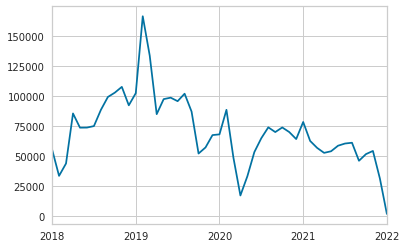

In [20]:
df_series_pre = pd.Series(data = x, index = y)
df_series_pre.plot()

In [21]:
post_pandemic_df = data_temp[(data_temp['DATE'] > '2020-03')]
pre_pandemic_df = data_temp[~(data_temp['DATE'] > '2020-03')]

post_pandemic_df

SECTOR,DATE,PRIVATE,PUBLIC,PRIVATE_PURE,PUBLIC_PURE
27,2020-04-01,16991.0,16231.0,0.0,0.0
28,2020-05-01,33071.0,23259.0,0.0,0.0
29,2020-06-01,53234.0,42370.0,53234.0,0.0
30,2020-07-01,64858.0,59335.0,64858.0,0.0
31,2020-08-01,73911.0,66832.0,73911.0,66832.0
32,2020-09-01,69955.0,64905.0,69955.0,64905.0
33,2020-10-01,73812.0,70606.0,73812.0,70606.0
34,2020-11-01,69988.0,86098.0,69988.0,86098.0
35,2020-12-01,64110.0,86790.0,64110.0,86790.0
36,2021-01-01,78381.0,82445.0,78381.0,82445.0


#### PRIVATE

<AxesSubplot:>

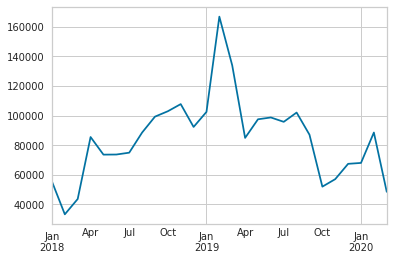

In [22]:
index = pre_pandemic_df['DATE'].values
data_to = pre_pandemic_df['PRIVATE'].values
df_series_pre = pd.Series(data = data_to, index = index)
df_series_pre.plot()

<AxesSubplot:>

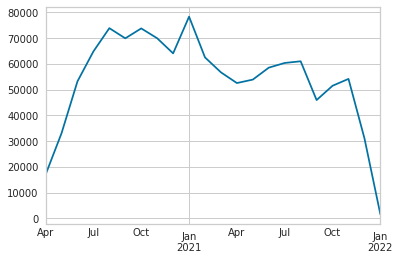

In [23]:
index = post_pandemic_df['DATE'].values
data_to = post_pandemic_df['PRIVATE'].values
df_series = pd.Series(data = data_to, index = index)
df_series.plot()

,Description,Value
0,session_id,4252
1,Target,Time Series
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(22, 1)"
5,Train data shape,"(21, 1)"
6,Test data shape,"(1, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,7
9,Enforce Prediction Interval,0


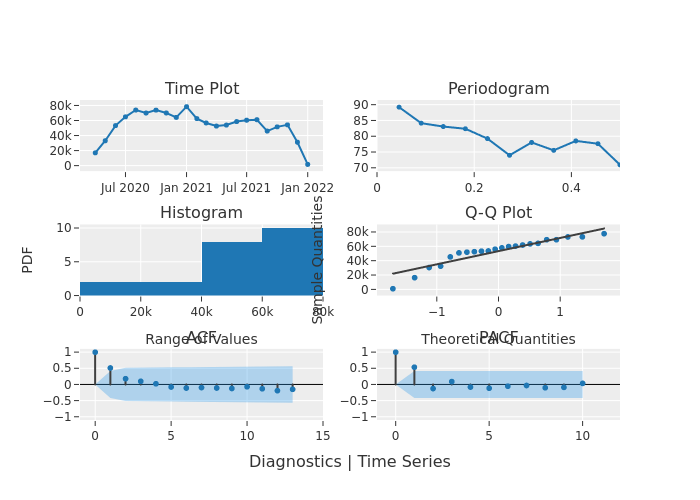

In [24]:

setup(data=df_series, fh = 1 , fold = 7)

plot_model(plot = 'diagnostics', 
           fig_kwargs={'renderer': 'png'})

In [25]:
plot_model(plot = 'decomp_stl', 
           fig_kwargs={'renderer': 'png'})

STL Decomposition is not supported for time series that have a seasonal period < 2. The seasonal period computed/provided was 1.


In [48]:
models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend.PolynomialTrendForeca...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
croston,Croston,sktime.forecasting.croston.Croston,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True


In [52]:
best_baseline_models = compare_models( sort='MAE', errors = 'raise', exclude = [], 
                                      verbose =False) # Media absolute error
best_baseline_models

/home/mnunez/.local/lib/python3.8/site-packages/sktime/utils/validation/series.py:21: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_INDEX_TYPES = (pd.Int64Index, pd.RangeIndex, pd.PeriodIndex, pd.DatetimeIndex)
/home/mnunez/.local/lib/python3.8/site-packages/sktime/forecasting/base/_fh.py:18: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  RELATIVE_TYPES = (pd.Int64Index, pd.RangeIndex)
/home/mnunez/.local/lib/python3.8/site-packages/sktime/forecasting/base/_fh.py:19: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  ABSOLUTE_TYPES = (pd.Int64Index, pd.RangeIndex, pd.DatetimeIndex, pd.PeriodIndex)
/home/mnunez/.local/lib/python3.8/site-packages/sktime/datatypes/_se

ARIMA()

/home/mnunez/.local/lib/python3.8/site-packages/sktime/utils/datetime.py:103: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  assert isinstance(by, (int, np.integer, pd.Int64Index)), type(by)
/home/mnunez/.local/lib/python3.8/site-packages/sktime/utils/datetime.py:40: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return pd.Int64Index([d.n / count for d in duration])
/home/mnunez/.local/lib/python3.8/site-packages/sktime/utils/validation/series.py:21: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_INDEX_TYPES = (pd.Int64Index, pd.RangeIndex, pd.PeriodIndex, pd.DatetimeIndex)
/home/mnunez/.local/lib/python3.8/site-packages/sktime/forecasting/base/_fh.py:18: Future

In [27]:
#best_baseline_models = 'auto_arima'
the_model = create_model(best_baseline_models)
print(the_model)

tuned_model= tune_model(the_model)
print(tuned_model)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE
0,2021-05,3296.0104,3296.0104,0.0563,0.0579,0.3699,0.3101
1,2021-06,501.9384,501.9384,0.0083,0.0083,0.0583,0.0486
2,2021-07,580.8969,580.8969,0.0095,0.0095,0.0712,0.0582
3,2021-08,17577.8623,17577.8623,0.3823,0.3210,2.2874,1.8189
4,2021-09,3986.3957,3986.3957,0.0774,0.0805,0.4910,0.3962
5,2021-10,1089.5955,1089.5955,0.0201,0.0199,0.1366,0.1104
6,2021-11,4718.2602,4718.2602,0.1515,0.1408,0.6130,0.4903
Mean,nan,4535.8513,4535.8513,0.1008,0.0911,0.5754,0.4618
SD,nan,5551.7980,5551.7980,0.1241,0.1036,0.7266,0.5765


BaseCdsDtForecaster(regressor=PassiveAggressiveRegressor(random_state=4252),
                    window_length=1)


/home/mnunez/.local/lib/python3.8/site-packages/sktime/forecasting/base/_fh.py:100: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  values = pd.Int64Index(values, dtype=int)
/home/mnunez/.local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/home/mnunez/.local/lib/

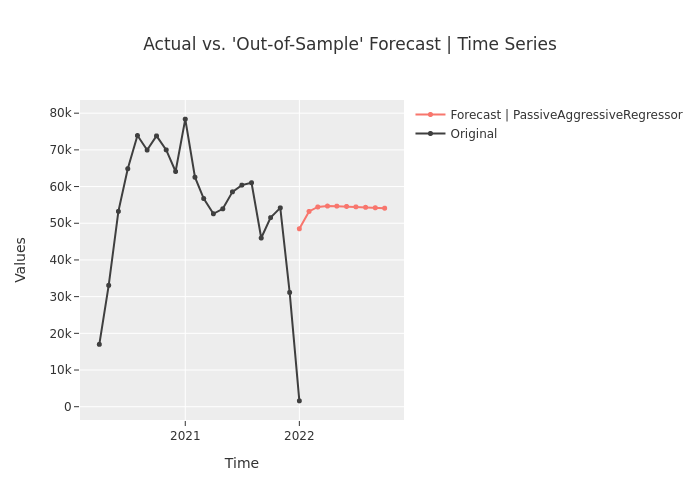

In [28]:
final_best = finalize_model(the_model)
predict_model(final_best, fh = 1)

abc = plot_model(the_model, 
           plot = 'forecast', 
           data_kwargs = {'fh' : 10}, 
           fig_kwargs={'renderer': 'png'})

In [29]:
np.mean(df_series_pre)

84507.9074074074

In [30]:
setup(data=df_series_pre)
best_baseline_models = compare_models(sort='MAE', errors = 'raise', verbose =False) # Media absolute error
print(best_baseline_models)

,Description,Value
0,session_id,463
1,Target,Time Series
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(27, 1)"
5,Train data shape,"(26, 1)"
6,Test data shape,"(1, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,3
9,Enforce Prediction Interval,0


/home/mnunez/.local/lib/python3.8/site-packages/sktime/forecasting/base/_fh.py:100: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  values = pd.Int64Index(values, dtype=int)
/home/mnunez/.local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/home/mnunez/.local/lib/

ARIMA()


In [31]:
the_model = create_model(best_baseline_models)
print(the_model)

tuned_model= tune_model(the_model)
print(tuned_model)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE
0,2019-11,9078.0830,9078.0830,0.1346,0.1261,0.5401,0.3817
1,2019-12,4490.7124,4490.7124,0.0660,0.0639,0.2717,0.1922
2,2020-01,13334.5727,13334.5727,0.1506,0.1629,0.8406,0.5831
Mean,nan,8967.7894,8967.7894,0.1171,0.1176,0.5508,0.3857
SD,nan,3611.3330,3611.3330,0.0367,0.0408,0.2324,0.1596


ARIMA()


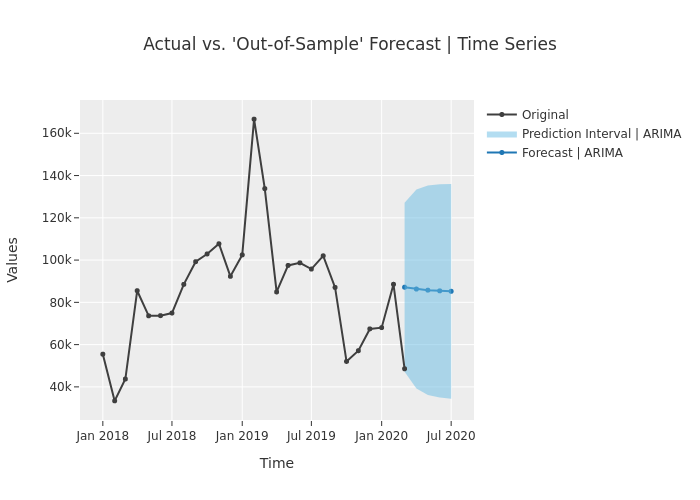

In [32]:
final_best = finalize_model(the_model)
predict_model(final_best, fh = 5)

plot_model(the_model, 
           plot = 'forecast', 
           data_kwargs = {'fh' : 5}, 
           fig_kwargs={'renderer': 'png'})

#### PUBLIC

<AxesSubplot:>

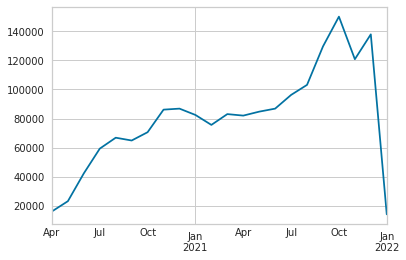

In [33]:
index = post_pandemic_df['DATE'].values
data_to = post_pandemic_df['PUBLIC'].values
df_series = pd.Series(data = data_to, index = index)

index = pre_pandemic_df['DATE'].values
data_to = pre_pandemic_df['PUBLIC'].values
df_series_pre = pd.Series(data = data_to, index = index)

df_series.plot()

In [34]:
print("Media: "+str(np.mean(df_series_pre)))

Media: 153583.24074074073


/home/mnunez/.local/lib/python3.8/site-packages/pycaret/utils/time_series/forecasting/model_selection.py:118: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lower = pd.Series([])
/home/mnunez/.local/lib/python3.8/site-packages/pycaret/utils/time_series/forecasting/model_selection.py:119: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  upper = pd.Series([])
/home/mnunez/.local/lib/python3.8/site-packages/pycaret/utils/time_series/forecasting/model_selection.py:118: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lower = pd.Series([])
/home/mnunez/.local/lib/python3.8/site-packages/pycaret/utils/time_series/forecasting/model_selection.py:119: Futur

In [ ]:
from pycaret.time_series import *
setup(data=df_series)

plot_model(plot = 'diagnostics', 
           fig_kwargs={'renderer': 'png'})

In [ ]:
plot_model(plot = 'diagnostics')

In [ ]:
best_baseline_models = compare_models(sort='MAE', errors = 'raise', verbose =False) # Media absolute error
best_baseline_models

In [ ]:
#best_baseline_models = 'auto_arima'
the_model = create_model(best_baseline_models)
print(the_model)

tuned_model= tune_model(the_model)
print(tuned_model)

In [ ]:
final_best = finalize_model(best_baseline_models)
final_best = finalize_model(the_model)
predict_model(final_best, fh = 5)

plot_model(the_model, 
           plot = 'forecast', 
           data_kwargs = {'fh' : 5}, 
           fig_kwargs={'renderer': 'png'})

In [ ]:
x =  list(data_to) + list(predict_model(final_best, fh = 5)['y_pred'])
x

In [ ]:
post_pandemic_df.head(50)

In [ ]:
import pandas as pd
from pycaret.datasets import get_data
data = get_data('pycaret_downloads')
data['Date'] = pd.to_datetime(data['Date'])
data = data.groupby('Date').sum()
data = data.asfreq('D')
data.head()

In [ ]:
# plot the data
data.plot()

In [ ]:
# with functional API
from pycaret.time_series import *
setup(data, fh = 7, fold = 3, session_id = 123)

In [ ]:
check_stats()

In [ ]:
# functional API
plot_model(plot = 'ts', 
           fig_kwargs={'renderer': 'png'})

In [ ]:
# cross-validation plot
plot_model(plot = 'cv', 
           fig_kwargs={'renderer': 'png'})

In [ ]:
# ACF plot
plot_model(plot = 'acf', 
           fig_kwargs={'renderer': 'png'})

In [ ]:
# Decomposition plot
plot_model(plot = 'decomp_stl', 
           fig_kwargs={'renderer': 'png'})

In [ ]:
# functional API
best = compare_models()

In [ ]:
best

In [ ]:
# create fbprophet model
best_model = create_model(best)
print(best_model)

In [ ]:
plot_model(best, plot = 'forecast', 
           fig_kwargs={'renderer': 'png'})